In [73]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sbn;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;
from sklearn import metrics;
%matplotlib inline

In [5]:
org_df = pd.read_csv('insurance.csv')

In [6]:
org_df.shape

(1338, 7)

In [7]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
org_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
org_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [15]:
org_df.duplicated().sum()

1

In [18]:
md_df = org_df.drop_duplicates()

In [19]:
md_df.shape

(1337, 7)

In [20]:
md_df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [21]:
md_df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


In [22]:
md_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null object
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null object
region      1337 non-null object
expenses    1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


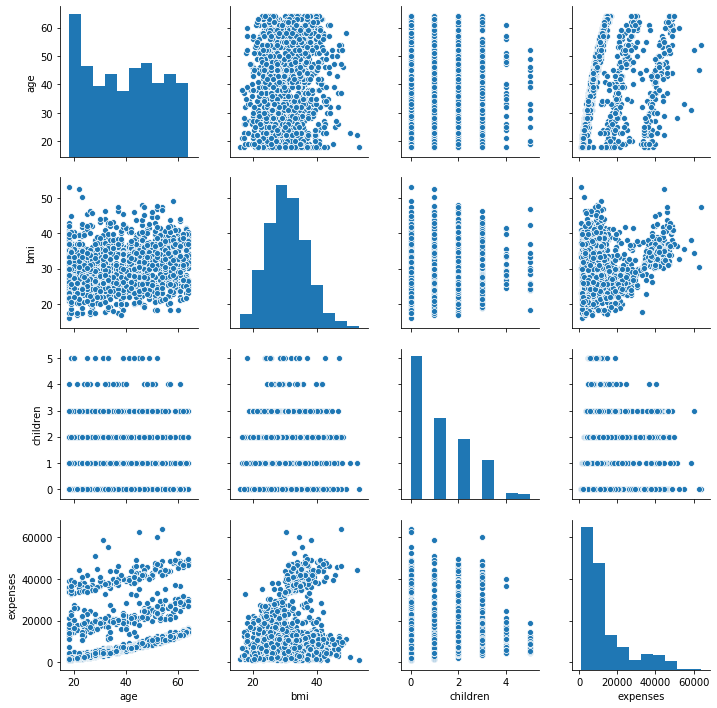

In [25]:
sbn.pairplot(md_df)

In [26]:
md_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [30]:
cat_col = md_df.select_dtypes(exclude = np.number).columns
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [32]:
num_col = md_df.select_dtypes(include = np.number).columns;
num_col

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [36]:
cat_num = pd.get_dummies(md_df[cat_col])

In [41]:
md_new = pd.concat([cat_num,md_df[num_col]],axis=1)

In [43]:
x = md_new.drop(columns = 'expenses')

In [45]:
y = md_new['expenses']

In [58]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state = 8)

In [59]:
lin = LinearRegression()

In [60]:
lin.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lin.intercept_

675.8689970990581

In [62]:
lin.coef_

array([   145.68079467,   -145.68079467, -12173.90447014,  12173.90447014,
          678.10581895,    482.66544639,   -602.31158283,   -558.45968251,
          243.64003194,    317.79396874,    503.21964002])

In [63]:
train_y_pred = lin.predict(train_x)

In [80]:
print('Train MSE', metrics.mean_squared_error(train_y,train_y_pred))

Train MSE 35969855.35839766


In [79]:
test_y_pred = lin.predict(test_x)
print('Test MSE', metrics.mean_squared_error(test_y,test_y_pred))

Test MSE 38303073.54662036


In [74]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [77]:
print('Train MAPE',mean_absolute_percentage_error(train_y,train_y_pred))

Train MAPE 39.97631313206201


In [76]:
print('Test MAPE',mean_absolute_percentage_error(test_y,test_y_pred))

Test MAPE 42.88227921940963


In [81]:
# FIND OUTLIERS
.describe()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.495138,0.504862,0.795064,0.204936,0.242334,0.242334,0.272251,0.243082,39.222139,30.665520,1.095737,13279.121638
std,0.500163,0.500163,0.403806,0.403806,0.428655,0.428655,0.445285,0.429104,14.044333,6.100664,1.205571,12110.359657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,16.000000,0.000000,1121.870000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,26.300000,0.000000,4746.340000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,30.400000,1.000000,9386.160000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,51.000000,34.700000,2.000000,16657.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,53.100000,5.000000,63770.430000
